In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Наложение и удаление шума

In [2]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

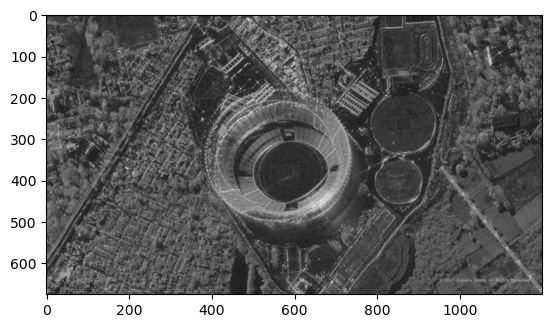

In [3]:
plt.imshow(image_gray, cmap="gray")

In [4]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0,  16,   0, ..., 111,   0,  80],
       [  1, 104,  68, ...,   0, 103,   0],
       [  0,   0,  51, ...,   0,   0, 145],
       ...,
       [  0,   0,  39, ..., 255,   0,  15],
       [  0,  34,   0, ...,   0,   5, 135],
       [160, 204,   0, ...,  21,   0, 109]], dtype=uint8)

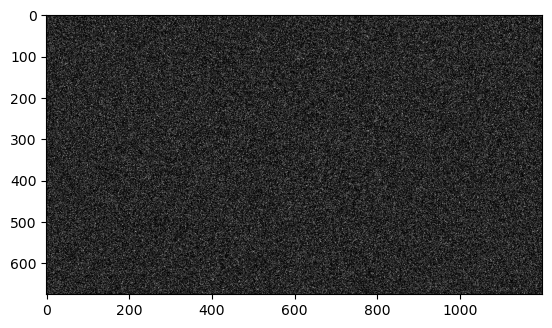

In [5]:
plt.imshow(noise_gauss, cmap="gray")

In [6]:
# Salt and pepper
noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

In [7]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [8]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

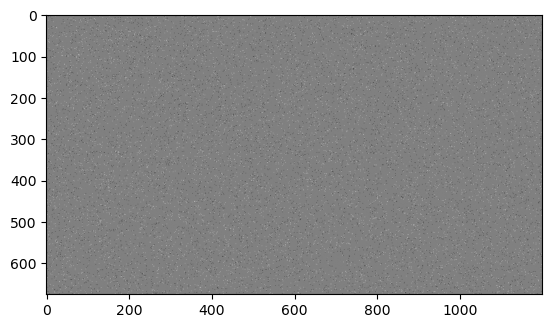

In [9]:
plt.imshow(bg_image, cmap="gray")

In [10]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)

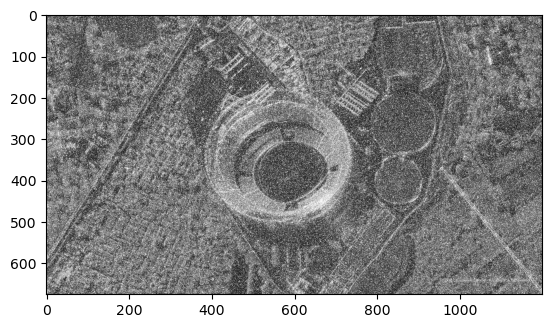

In [11]:
plt.imshow(image_noise_gauss, cmap="gray")

In [12]:
from skimage.metrics import structural_similarity, mean_squared_error
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

4230.673058024691 0.1869926680003536


In [13]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [14]:
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)

In [15]:
print(mse_gauss_median, ssim_gauss_median)

1038.0453432098766 0.4282430571563417


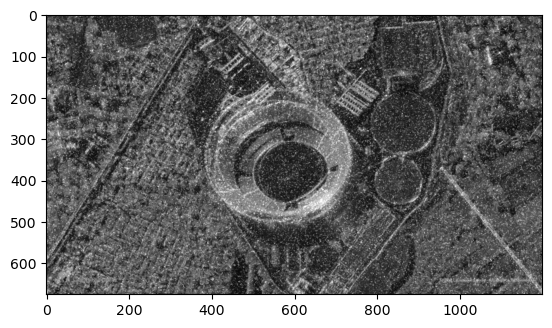

In [16]:
plt.imshow(image_gauss_median, cmap="gray")

In [17]:
import copy

image_sp = copy.deepcopy(image_gray)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

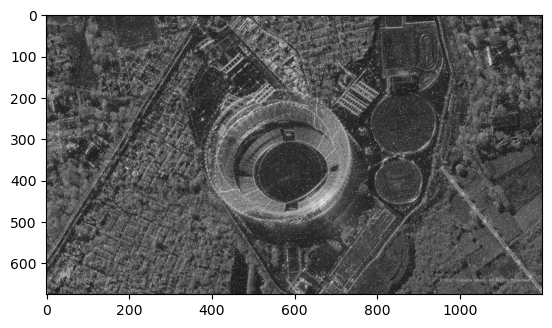

In [18]:
plt.imshow(image_sp, cmap="gray")

In [19]:
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

389.50943333333333 0.7204300930006738


In [20]:
image_sp_median = cv2.medianBlur(image_sp, 3)

In [21]:
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

95.73981234567901 0.8162009156527614


# Другие типы фильтров

In [22]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [23]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [24]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)

In [25]:
import math

def geom(a):
    prod = 1
    for i in range(a.shape[0]):
        prod1 = 1
        for j in range(a.shape[1]):
            prod1 *= a[i,j]
        prod1 = math.pow(prod1, 1.0/9.0)
        prod *= prod1
    return prod

def proc(img, filter):
    img_res = copy.deepcopy(img)
    for i in range(0,img.shape[0] -2):
        for j in range(0,img.shape[1] -2):
            img_res[i:i+3, j:j+3] = filter(img[i:i+3, j:j+3])
    return img_res
    
res = proc(image_noise_gauss, geom)


C:\Users\Evgenii\AppData\Local\Temp\ipykernel_12836\164976186.py:8: RuntimeWarning: overflow encountered in scalar multiply
  prod1 *= a[i,j]


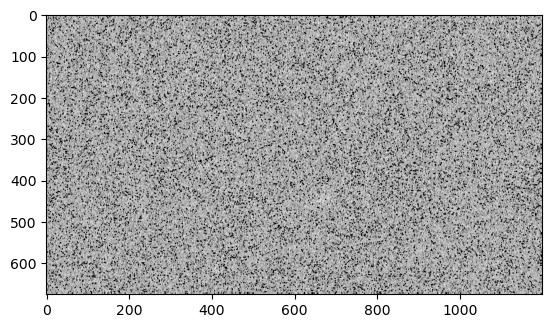

In [26]:
plt.imshow(res, cmap="gray")

In [27]:
mse_geom = mean_squared_error(image_gray, res)
(ssim_geom, diff) = structural_similarity(image_gray, res, full=True)
print(mse_geom, ssim_geom)

6551.976648148148 0.02746126776511091



# 2D свертка

In [28]:
# averaging filter
kernel_5 = np.ones((5,5),np.float32)/25
image_k5 = cv2.filter2D(image_gray,-1,kernel_5)
# blured_image = cv2.blur(img,(5,5))
image_b5 = cv2.blur(image_gray,(5,5))

In [29]:
mse_kb = mean_squared_error(image_k5, image_b5)
(ssim_kb, diff) = structural_similarity(image_k5, image_b5, full=True)
print(mse_kb, ssim_kb)

0.0 1.0


In [30]:
# Laplasian
kernel_lapl = np.array([[0,-10,0],
                        [-10,40,-10],
                        [0,-10,0]], np.float32)

In [31]:
image_lapl = cv2.filter2D(image_gray,-1,kernel_lapl) 

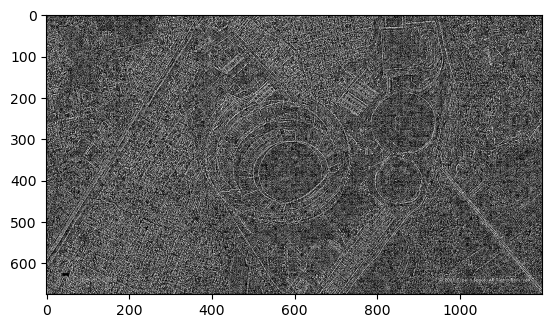

In [32]:
plt.imshow(image_lapl, cmap="gray")

In [33]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

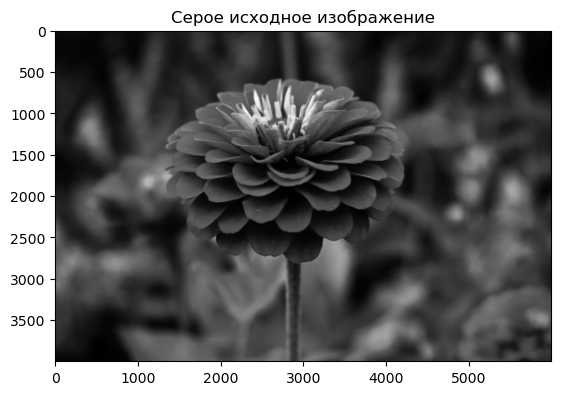

In [34]:
# Шум Гаусса
image = cv2.imread('img.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")
plt.title("Серое исходное изображение")
plt.show()

![](Figure_11.png)

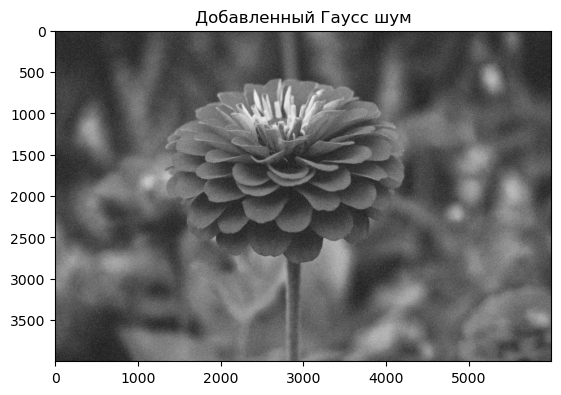

Гаусс шум MSE, SSIM:  4498.42281 0.02586061042392922


In [35]:
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

image_noise_gauss = cv2.add(image_gray,noise_gauss)
plt.imshow(image_noise_gauss, cmap="gray")
plt.title("Добавленный Гаусс шум")
plt.show()

mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print("Гаусс шум MSE, SSIM: ", mse_gauss, ssim)

![](Figure_12.png)

Гаусс шум MSE, SSIM:  4498.495616958333 0.025890101157439064

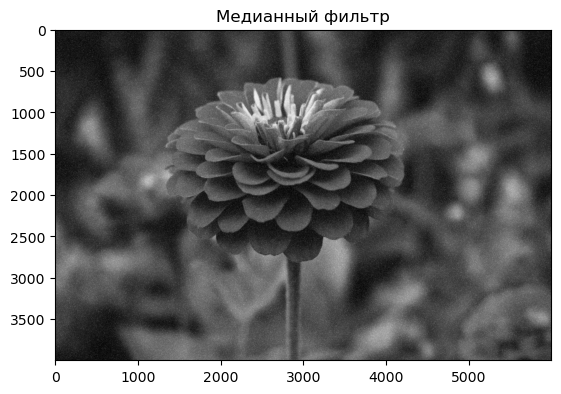

Медианный:  844.2647662083333 0.15358064942568786


In [36]:
image_sp_median = cv2.medianBlur(image_noise_gauss, 3)
plt.imshow(image_sp_median, cmap="gray")
plt.title("Медианный фильтр")
plt.show()

mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff11) = structural_similarity(image_gray, image_sp_median, full=True)
print("Медианный: ", mse_sp_median, ssim_sp_median)

![](Figure_13.png)

Медианный:  844.0684315833333 0.15361941488749958

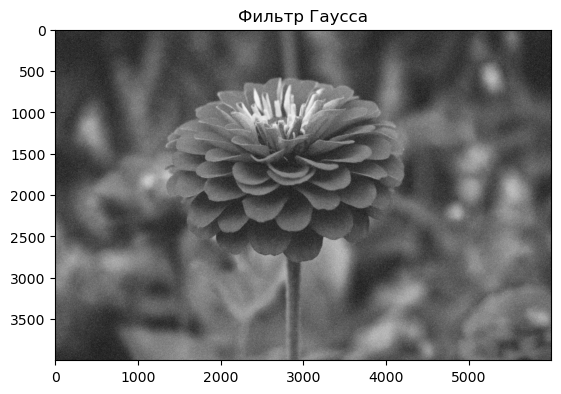

Гауссовский:  1729.277328 0.23035505600744793


In [37]:
image_sp_gauss = cv2.GaussianBlur(image_noise_gauss, (5, 5), 0)
plt.imshow(image_sp_gauss, cmap="gray")
plt.title("Фильтр Гаусса")
plt.show()

mse_sp_gauss = mean_squared_error(image_gray, image_sp_gauss)
(ssim_sp_gauss, diff22) = structural_similarity(image_gray, image_sp_gauss, full=True)
print("Гауссовский: ", mse_sp_gauss, ssim_sp_gauss)

![](Figure_14.png)

Гауссовский:  1729.2054128333334 0.2304045520784349

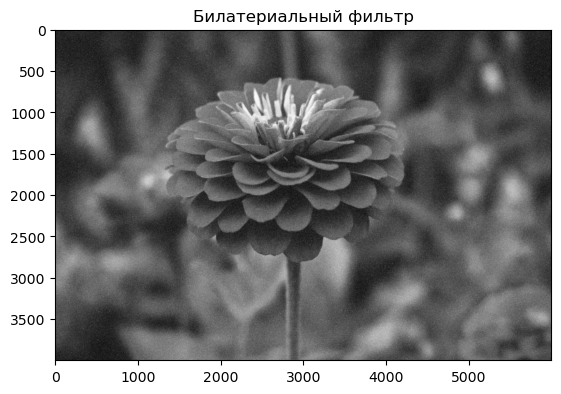

Билатериальный:  1786.305773375 0.10439656137329756


In [38]:
image_sp_bilat = cv2.bilateralFilter(image_noise_gauss, 9, 75, 75)
plt.imshow(image_sp_bilat, cmap="gray")
plt.title("Билатериальный фильтр")
plt.show()

mse_sp_bilat = mean_squared_error(image_gray, image_sp_bilat)
(ssim_sp_bilat, diff33) = structural_similarity(image_gray, image_sp_bilat, full=True)
print("Билатериальный: ", mse_sp_bilat, ssim_sp_bilat)

![](Figure_15.png)

Билатериальный:  1786.3903612083334 0.10450695156513874

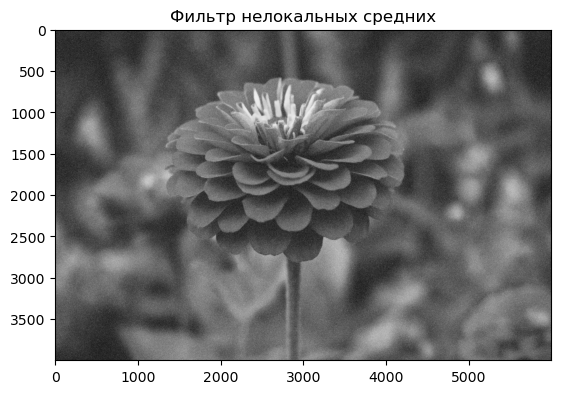

nlm:  4486.1434024166665 0.02887469942124366


In [39]:
image_sp_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h=20)
plt.imshow(image_sp_nlm, cmap="gray")
plt.title("Фильтр нелокальных средних")
plt.show()

mse_sp_nlm = mean_squared_error(image_gray, image_sp_nlm)
(ssim_sp_nlm, diff44) = structural_similarity(image_gray, image_sp_nlm, full=True)
print("nlm: ", mse_sp_nlm, ssim_sp_nlm)

![](Figure_16.png)

nlm:  4486.269640875 0.02893100217642121

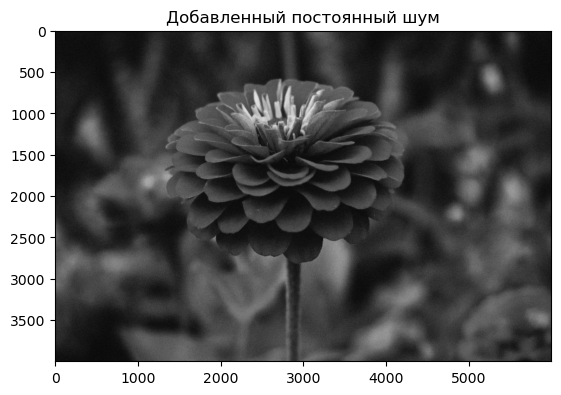

Постоянный шум MSE, SSIM:  724.9367195833333 0.10531910727735892


In [40]:
# 2 Постоянный шум
noise_intensity = 50
uniform_noise = np.random.uniform(-noise_intensity, noise_intensity, image_gray.shape)
uniform_noise = uniform_noise.astype(np.int16)
image_uniform_noise = image_gray.astype(np.int16) + uniform_noise
image_uniform_noise = np.clip(image_uniform_noise, 0, 255).astype(np.uint8)

plt.imshow(image_uniform_noise, cmap="gray")
plt.title("Добавленный постоянный шум")
plt.show()

mse_noise = mean_squared_error(image_gray, image_uniform_noise)
(ssim, diff55) = structural_similarity(image_gray, image_uniform_noise, full=True)
print("Постоянный шум MSE, SSIM: ", mse_noise, ssim)

![](Figure_17.png)

Постоянный шум MSE, SSIM:  725.1629088333333 0.10523891939552157

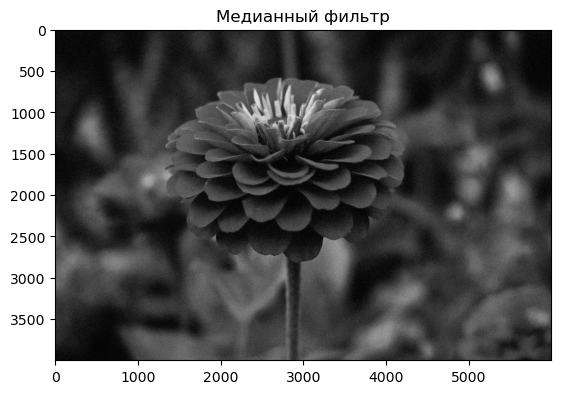

Медианный:  210.024736625 0.27784382234248767


In [41]:
image_noise_median = cv2.medianBlur(image_uniform_noise, 3)
plt.imshow(image_noise_median, cmap="gray")
plt.title("Медианный фильтр")
plt.show()

mse_noise_median = mean_squared_error(image_gray, image_noise_median)
(ssim_noise_median, diff66) = structural_similarity(image_gray, image_noise_median, full=True)
print("Медианный: ", mse_noise_median, ssim_noise_median)

![](Figure_18.png)

Медианный:  210.12062370833334 0.27776816133960663

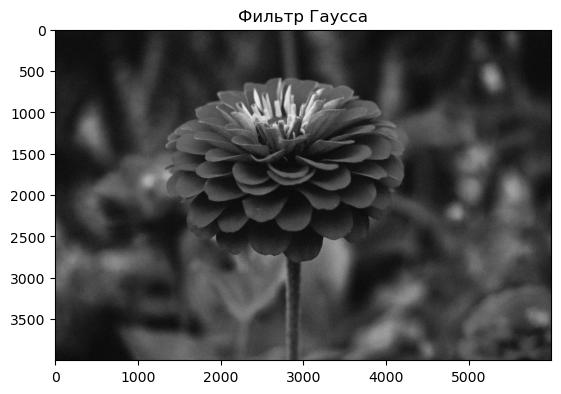

Гауссовский:  71.550857 0.5613267248513684


In [42]:
image_noise_gauss = cv2.GaussianBlur(image_uniform_noise, (5, 5), 0)
plt.imshow(image_noise_gauss, cmap="gray")
plt.title("Фильтр Гаусса")
plt.show()

mse_noise_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim_noise_gauss, diff77) = structural_similarity(image_gray, image_noise_gauss, full=True)
print("Гауссовский: ", mse_noise_gauss, ssim_noise_gauss)

![](Figure_19.png)

Гауссовский:  71.55345170833333 0.5611353878314782

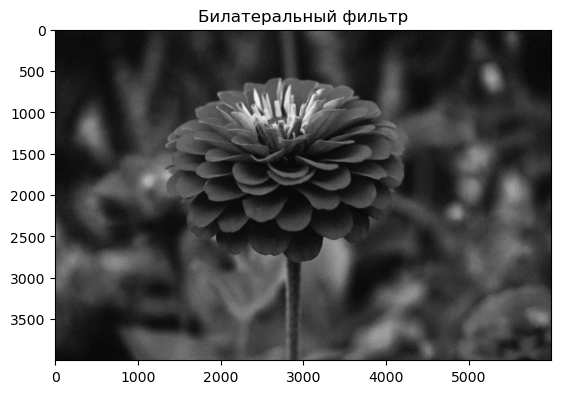

Билатериальный:  46.527550625 0.678447438526009


In [43]:
image_noise_bilat = cv2.bilateralFilter(image_uniform_noise, 9, 75, 75)
plt.imshow(image_noise_bilat, cmap="gray")
plt.title("Билатеральный фильтр")
plt.show()

mse_noise_bilat = mean_squared_error(image_gray, image_noise_bilat)
(ssim_noise_bilat, diff88) = structural_similarity(image_gray, image_noise_bilat, full=True)
print("Билатериальный: ", mse_noise_bilat, ssim_noise_bilat)

![](Figure_20.png)

Билатериальный:  46.510100625 0.6783054521603691

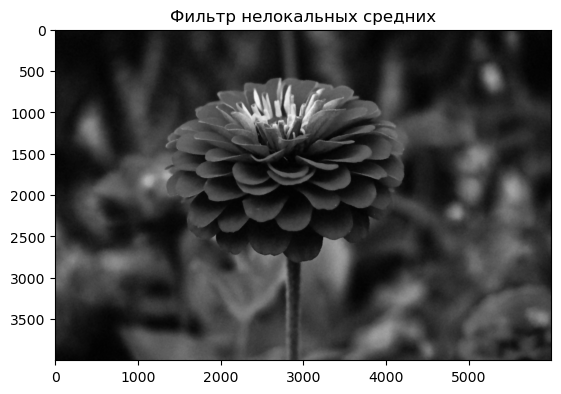

nlm:  41.265295625 0.6933538950801773


In [44]:
image_noise_nlm = cv2.fastNlMeansDenoising(image_uniform_noise, h=20)
plt.imshow(image_noise_nlm, cmap="gray")
plt.title("Фильтр нелокальных средних")
plt.show()

mse_noise_nlm = mean_squared_error(image_gray, image_noise_nlm)
(ssim_noise_nlm, diff99) = structural_similarity(image_gray, image_noise_nlm, full=True)
print("nlm: ", mse_noise_nlm, ssim_noise_nlm)

![](Figure_21.png)

nlm:  41.275566875 0.6931159188434712

In [45]:
# Итог
# Гаусс шум MSE, SSIM:  4498.495616958333 0.025890101157439064
# Медианный:  844.0684315833333 0.15361941488749958
# Гауссовский:  1729.2054128333334 0.2304045520784349
# Билатериальный:  1786.3903612083334 0.10450695156513874
# nlm:  4486.269640875 0.02893100217642121
# --------------------------------------------------------------------
# Постоянный шум MSE, SSIM:  725.1629088333333 0.10523891939552157
# Медианный:  210.12062370833334 0.27776816133960663
# Гауссовский:  71.55345170833333 0.5611353878314782
# Билатериальный:  46.510100625 0.6783054521603691
# nlm:  41.275566875 0.6931159188434712
#
# В среднем, Гауссовский фильтр срабатывает лучше остальных.